In [1]:
import numpy as np
from MyML import *
import pandas as pd
import scipy.signal as sig
import string

In [2]:
yelp = pd.read_csv('yelp_labelled.txt', header = None, sep = "\t", engine = 'python').values

In [3]:
imdb = pd.read_csv('imdb_labelled.txt',header  = None, sep = "  ", engine = 'python').values

In [4]:
amazon = pd.read_csv('amazon_cells_labelled.txt',header  = None, sep = "\t", engine = 'python').values

In [5]:
new = np.row_stack((yelp,amazon, imdb))

In [6]:
h = new.copy()
m = new.copy()
for j in range(len(h)):
    insert_points = range (1, len (h[j,0]))
    import random
    selected = random.sample (insert_points, 4)
    selected.sort ()
    selected.append (len (h[j,0]))  #  include the last slice
    temp = 0  #  start with first slice
    result = []
    for i in selected :
      result.append (h[j,0] [temp:i])
      temp = i
    x=" ".join (result)
    h[j,0]=x
for j in range(len(m)):
    for i in range(2):
        insert_points = range (1, len (m[j,0]))
        import random
        selected = random.sample (insert_points, 1)
        selected.sort ()
        selected.append (len (m[j,0]))  #  include the last slice
        temp = 0  #  start with first slice
        result = []
        for i in selected :
          result.append (m[j,0] [temp:i])
          temp = i
        x=random.choice(('e'*10+'t'*9+'a'*8+'o'*7+'i'*6+'n'*5+'s'*4+'r'*3)*4+string.ascii_lowercase*3+string.printable).join (result)
        m[j,0]=x

In [7]:
full = np.row_stack((new,h,m))

In [8]:
def TVTsplit(matrix, train = .7):
    #     This function's purpose is to split a given matrix
    #     into three parts: train, test, and validate. The 
    #     train parameter is the percentage of the data that
    #     goes into training 70% by default. The val parameter
    #     determines how much goes into the validation set
    #     15% by default. The rest of the data goes into
    #     the test set.
    
#     The following is needed to perform the operations
#     in the calculations in here.
    import numpy as np
    # The following does some common sense things like
    # telling you that train and val need to add up to less
    # than 1.

    if(train > .99):
        print("Splitting failed. Please make sure that train is less than .99 so that test and val have enough data.")
        return 0
    
#     These two things calculate the subset lengths that 
#     are needed for the subsetting.
    splitnum = int(len(matrix[:,0])*train)
    splitnum2 = int((len(matrix[:,0]) - splitnum)/2)
#     np.random.shuffle(matrix)

#     The next three separate the data into the three sets
#     using the splitnums from above.
    Train = matrix[0:splitnum,]
    Test = matrix[splitnum:(splitnum+splitnum2),]
    Val = matrix[(splitnum+splitnum2):,]
    return Train, Val, Test

In [9]:
train, val, test = TVTsplit(full)

In [10]:
newtrain = []
for i in range(0,len(train)):
    afied = [ord(k) for k in train[i][0]]
    temp = np.zeros((len(train[i][0]),256))
    for j in range(0,len(train[i][0])):
        temp[j,afied[j]] = 1
    if len(temp)%8 != 0:
        temp = np.row_stack((temp,np.zeros((8-len(temp)%8,256))))
    newtrain.append(temp)  
newval = []
for i in range(0,len(val)):
    afied = [ord(k) for k in val[i][0]]
    temp = np.zeros((len(val[i][0]),256))
    for j in range(0,len(val[i][0])):
        temp[j,afied[j]] = 1
    if len(temp)%8 != 0:
        temp = np.row_stack((temp,np.zeros((8-len(temp)%8,256))))
    newval.append(temp) 
newtest = []
for i in range(0,len(test)):
    afied = [ord(k) for k in test[i][0]]
    temp = np.zeros((len(test[i][0]),256))
    for j in range(0,len(test[i][0])):
        temp[j,afied[j]] = 1
    if len(temp)%8 != 0:
        temp = np.row_stack((temp,np.zeros((8-len(temp)%8,256))))
    newtest.append(temp)  

In [11]:
Ytrain = np.array(train[:,-1], dtype = int).reshape(-1,1)
Yval = np.array(val[:,-1], dtype = int).reshape(-1,1)
Ytest = np.array(test[:,-1], dtype = int).reshape(-1,1)

In [18]:
model = NeuralNetwork(indims = 256, nodes = [32,1,7*4,10,1], activations = ['conv','spp','flatten','relu'], taskType = 'c')

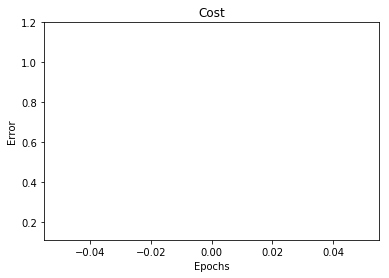

In [19]:
errs = []
w = []
for j in range(0,3):
    for i in range(100):
        model.train(newtrain[i],Ytrain[i], epochs = 1, lr = .003)
        errs.append(model.errs[-1])
#         w.append(model.layers[1].dx)

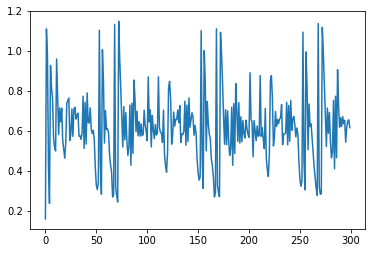

In [20]:
plt.plot(errs)

In [ ]:
preds = []
for i in range(len(newval)):
    model.predict(newval[i], p = 1)
    preds.append(model.probabilities)

In [ ]:
np.sum(np.round(preds))

In [ ]:
print(np.sum(newtrain[0], axis = 0))
train[0]